In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Loading Accident Data 

In [2]:
df=pd.read_csv('../Dataset/accidents_2012_to_2014.csv')

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.shape

(570011, 33)

# DATA PREPROCESSING

In [4]:

data=df.iloc[:4000,:]

NOTE-> ACCIDENT_SEVERITY
        1:"SLight"
        2:"Severe"
        3:"Fatal"


***printing data shape we are working with***

-->We reduced the data size from 5 lakh data to just 4000 , to make the computation fast


In [5]:
data.shape

(4000, 33)

***Checking for null values in data***

In [6]:
data.isna().sum()

Accident_Index                                    0
Location_Easting_OSGR                             0
Location_Northing_OSGR                            0
Longitude                                         0
Latitude                                          0
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                              0
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                4000
Junction_Con

In [7]:
data=data.drop(["Junction_Detail","Junction_Control"] , axis=1)

In [8]:
data.isna().sum()

Accident_Index                                  0
Location_Easting_OSGR                           0
Location_Northing_OSGR                          0
Longitude                                       0
Latitude                                        0
Police_Force                                    0
Accident_Severity                               0
Number_of_Vehicles                              0
Number_of_Casualties                            0
Date                                            0
Day_of_Week                                     0
Time                                            0
Local_Authority_(District)                      0
Local_Authority_(Highway)                       0
1st_Road_Class                                  0
1st_Road_Number                                 0
Road_Type                                       0
Speed_limit                                     0
2nd_Road_Class                                  0
2nd_Road_Number                                 0


In [9]:
data=data.dropna(axis=0)

In [10]:
data.isna().sum()

Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Pedestrian_Crossing-

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3945 entries, 0 to 3999
Data columns (total 31 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Accident_Index                               3945 non-null   object 
 1   Location_Easting_OSGR                        3945 non-null   float64
 2   Location_Northing_OSGR                       3945 non-null   float64
 3   Longitude                                    3945 non-null   float64
 4   Latitude                                     3945 non-null   float64
 5   Police_Force                                 3945 non-null   int64  
 6   Accident_Severity                            3945 non-null   int64  
 7   Number_of_Vehicles                           3945 non-null   int64  
 8   Number_of_Casualties                         3945 non-null   int64  
 9   Date                                         3945 non-null   object 
 10  

# ***DATA VISUALIZATION***

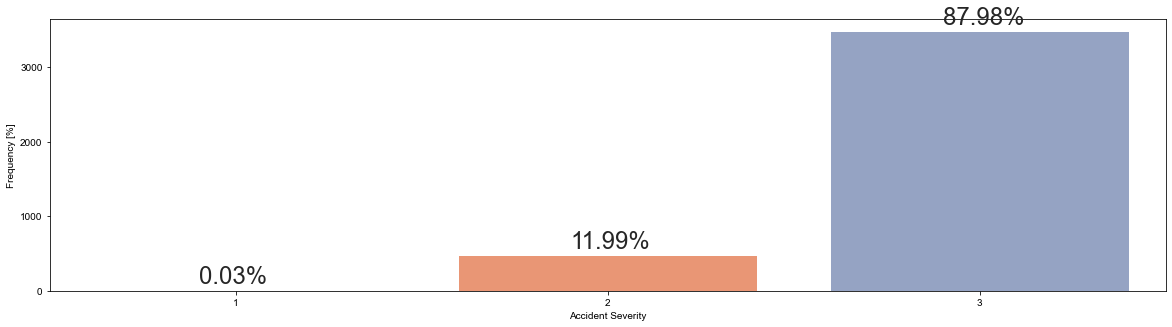

In [12]:
ax = sns.countplot(x = data.Accident_Severity ,palette="Set2")
sns.set(font_scale=2)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(20,5)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(data.Accident_Severity)), (p.get_x()+ 0.3, p.get_height()+100))


plt.xlabel('Accident Severity')
plt.ylabel('Frequency [%]')
plt.show()

***Inference-> We clearly can see that the ratio of fatal cases are very high in road accident***

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


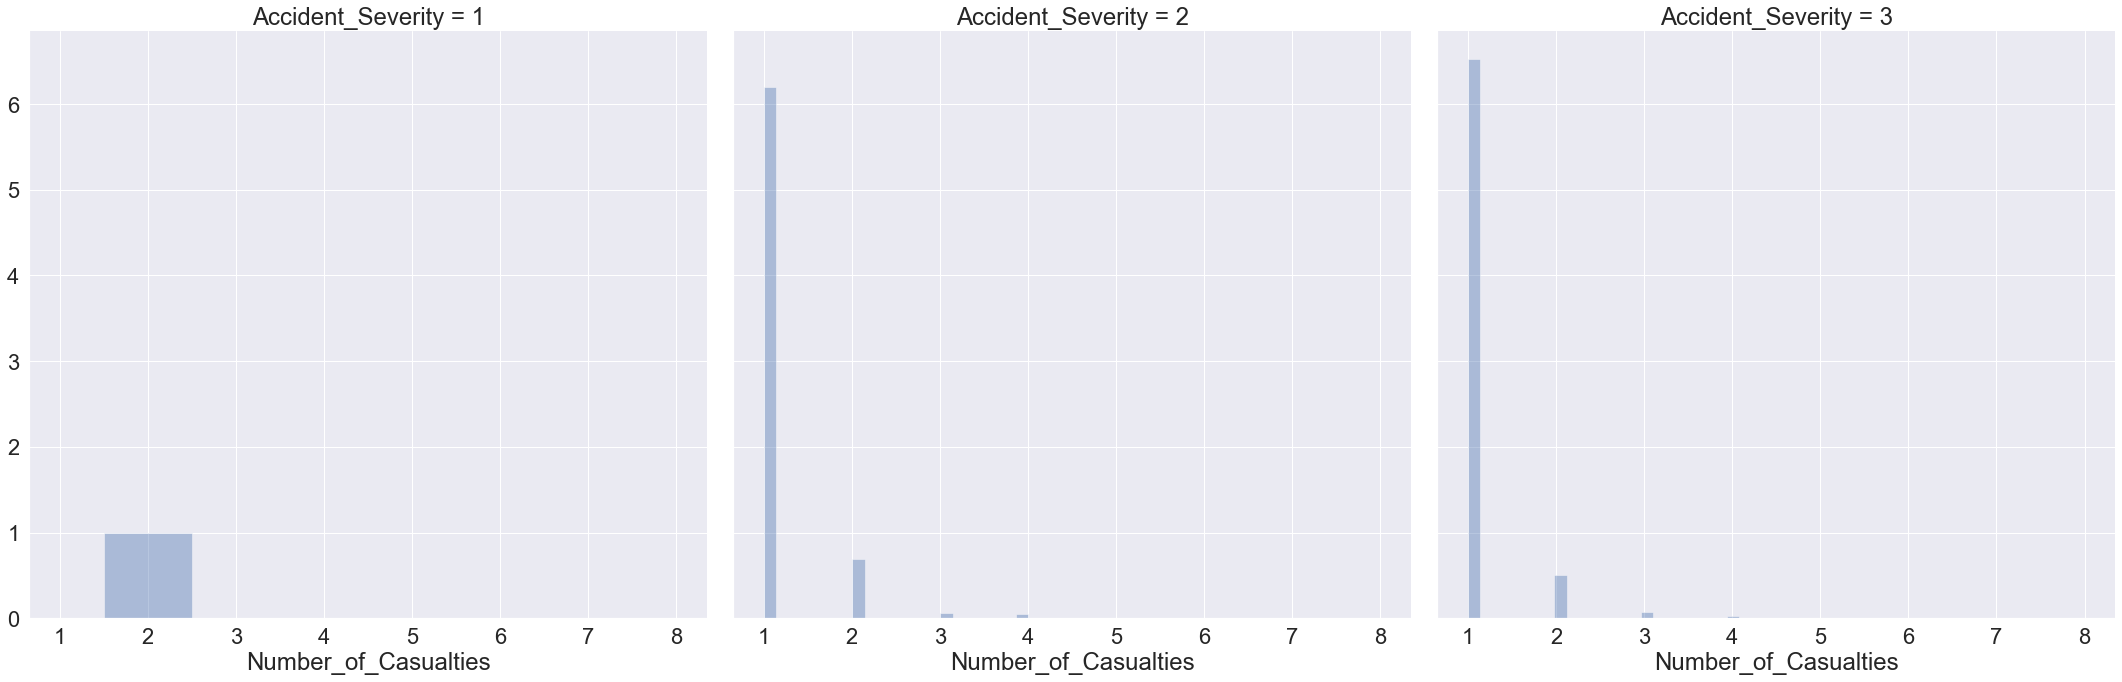

In [13]:
fig=sns.FacetGrid(data,col="Accident_Severity",size=10 ,palette="Set1")
fig.map(sns.distplot,"Number_of_Casualties")

In [14]:
data["Number_of_Casualties"].value_counts()

1    3592
2     294
3      41
4      15
5       2
8       1
Name: Number_of_Casualties, dtype: int64

In [15]:
data['Speed_limit'].unique()

array([30, 40, 50, 20, 60], dtype=int64)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


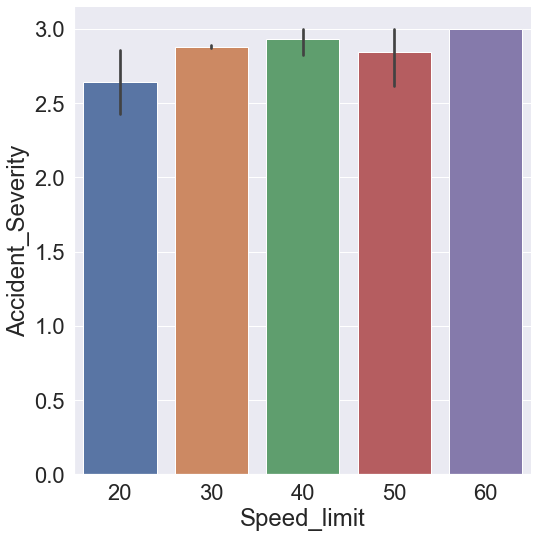

In [16]:
sns.factorplot("Speed_limit","Accident_Severity",data=data,size=8,kind="bar")
plt.show()

***Inference->We clearly can see that the more the speed more the accident severity is*** 

# ENCODING CATEGORICAL DATA

->> Removing unnecessary columns

In [17]:
cols_to_remove=['Pedestrian_Crossing-Human_Control','Urban_or_Rural_Area','1st_Road_Class','1st_Road_Number','Road_Type','Pedestrian_Crossing-Physical_Facilities']
data=data.drop(cols_to_remove ,axis=1)

In [18]:
data.shape

(3945, 25)

In [19]:
data.head(5)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,2nd_Road_Class,2nd_Road_Number,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,-1,0,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,5,0,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,-1,0,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,-1,0,Daylight: Street light present,Fine without high winds,Dry,None,None,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,-1,0,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,Yes,E01002863,2005


In [20]:
data['Light_Conditions'].unique()

array(['Daylight: Street light present',
       'Darkness: Street lights present and lit',
       'Darkness: Street lighting unknown',
       'Darkness: Street lights present but unlit',
       'Darkeness: No street lighting'], dtype=object)

In [21]:
data["Weather_Conditions"].unique()

array(['Raining without high winds', 'Fine without high winds', 'Unknown',
       'Snowing without high winds', 'Other', 'Fine with high winds',
       'Raining with high winds', 'Fog or mist'], dtype=object)

In [22]:
encod={"Daylight: Street light present":1,"Darkness: Street lights present and lit":2,"Darkness: Street lighting unknown":3,"Darkness: Street lights present but unlit":4,"Darkeness: No street lighting":5}
encod2={"Raining without high winds":1,"Fine without high winds":2,"Unknown":3,"Snowing without high winds":4,"Other":5, "Fine with high winds":6,"Raining with high winds":7,"Fog or mist":8}
data["Light_Conditions"]=data["Light_Conditions"].map(encod)
data["Weather_Conditions"]=data["Weather_Conditions"].map(encod2)

data.head(2)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,2nd_Road_Class,2nd_Road_Number,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,-1,0,1,1,Wet/Damp,None,None,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,5,0,2,2,Dry,None,None,Yes,E01002909,2005


In [23]:
data.head(10)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,2nd_Road_Class,2nd_Road_Number,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,-1,0,1,1,Wet/Damp,None,None,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,5,0,2,2,Dry,None,None,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,-1,0,2,2,Dry,None,None,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,-1,0,1,2,Dry,None,None,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,-1,0,3,2,Wet/Damp,None,None,Yes,E01002863,2005
5,200501BS00006,524770.0,181160.0,-0.203238,51.515540,1,3,2,1,11/01/2005,...,-1,0,1,1,Wet/Damp,Ol or diesel,None,Yes,E01002832,2005
6,200501BS00007,524220.0,180830.0,-0.211277,51.512695,1,3,2,1,13/01/2005,...,6,0,2,2,Dry,None,None,Yes,E01002875,2005
7,200501BS00009,525890.0,179710.0,-0.187623,51.502260,1,3,1,2,14/01/2005,...,-1,0,1,2,Dry,None,None,Yes,E01002889,2005
8,200501BS00010,527350.0,177650.0,-0.167342,51.483420,1,3,2,2,15/01/2005,...,4,304,2,2,Dry,None,None,Yes,E01002900,2005
9,200501BS00011,524550.0,180810.0,-0.206531,51.512443,1,3,2,5,15/01/2005,...,5,0,1,2,Dry,None,None,Yes,E01002875,2005


# ***FEATURE EXTRACTION***

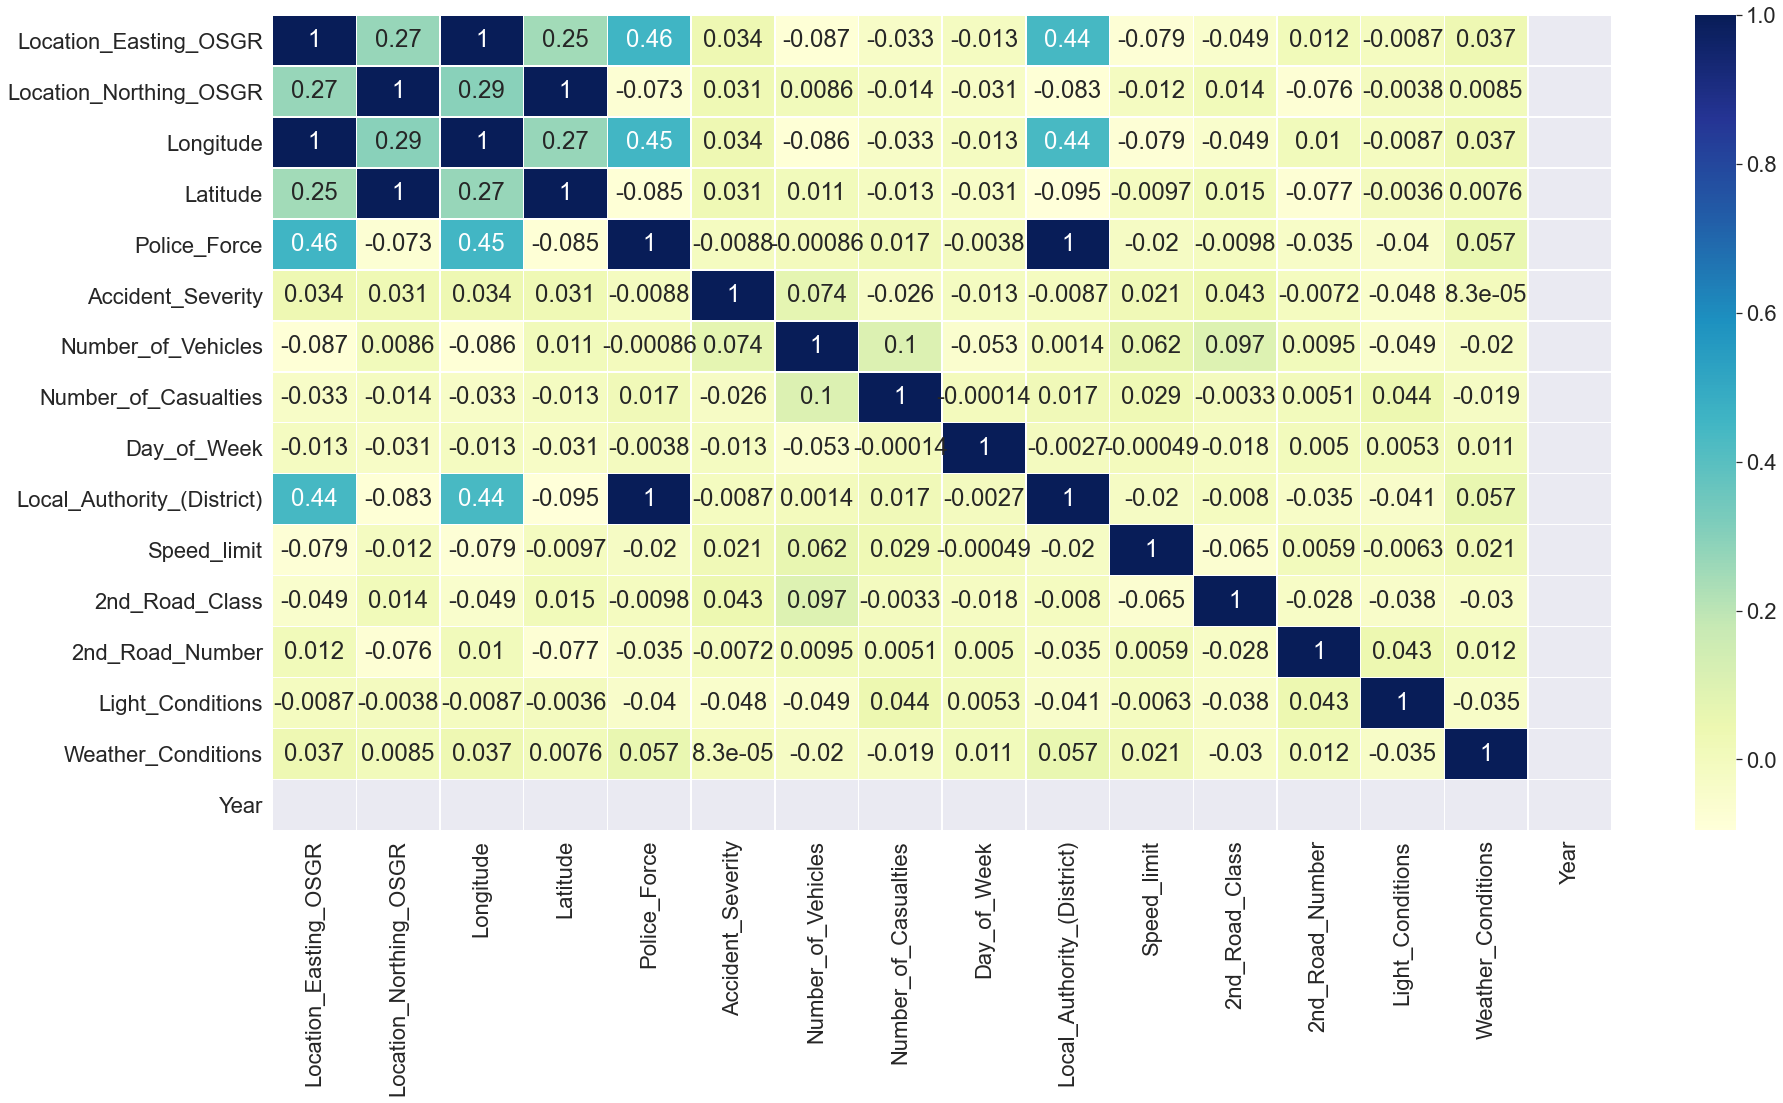

In [24]:
plt.figure(figsize=(30,15))
sns.heatmap(data.corr(), annot=True,linewidths=.5,cmap="YlGnBu" )
plt.show()

***Inference--> Features having negative correlation value with Accident_severity does not have significant role in predicting the accident_severity***

In [25]:
data["Time"]=pd.to_datetime(data["Time"], format='%H:%M').dt.time

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3945 entries, 0 to 3999
Data columns (total 25 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Accident_Index                               3945 non-null   object 
 1   Location_Easting_OSGR                        3945 non-null   float64
 2   Location_Northing_OSGR                       3945 non-null   float64
 3   Longitude                                    3945 non-null   float64
 4   Latitude                                     3945 non-null   float64
 5   Police_Force                                 3945 non-null   int64  
 6   Accident_Severity                            3945 non-null   int64  
 7   Number_of_Vehicles                           3945 non-null   int64  
 8   Number_of_Casualties                         3945 non-null   int64  
 9   Date                                         3945 non-null   object 
 10  

In [27]:
x=data[["Location_Easting_OSGR","Location_Northing_OSGR","Longitude","Latitude","Day_of_Week","Speed_limit","2nd_Road_Class","Number_of_Vehicles","Light_Conditions"]]
y=data['Accident_Severity']
x .head(5)     

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Day_of_Week,Speed_limit,2nd_Road_Class,Number_of_Vehicles,Light_Conditions
0,525680.0,178240.0,-0.191170,51.489096,3,30,-1,1,1
1,524170.0,181650.0,-0.211708,51.520075,4,30,5,1,2
2,524520.0,182240.0,-0.206458,51.525301,5,30,-1,2,2
3,526900.0,177530.0,-0.173862,51.482442,6,30,-1,1,1
4,528060.0,179040.0,-0.156618,51.495752,2,30,-1,1,3


# TRAINING MODELS

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [29]:

dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier(n_estimators=200,criterion="entropy")
nb=GaussianNB()
lr=LogisticRegression()


In [30]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y)


In [32]:
dtc.fit(x_train,y_train)
rfc.fit(x_train,y_train)
nb.fit(x_train,y_train)
lr.fit(x_train,y_train)

LogisticRegression()

# PREDICTING TARGET VALUES AND CALCULAING ACCURACY SCORES OF MODEL

In [33]:
de_pred=dtc.predict(x_test)
rf_pred=rfc.predict(x_test)
nb_pred=nb.predict(x_test)
lr_pred=lr.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [35]:
print("accuracy for decisin tree is:{}%".format(accuracy_score(y_test,de_pred)*100))
print(classification_report(y_test,de_pred))

accuracy for decisin tree is:78.52077001013171%
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.14      0.13      0.13       125
           3       0.87      0.88      0.88       862

    accuracy                           0.79       987
   macro avg       0.34      0.34      0.34       987
weighted avg       0.78      0.79      0.78       987



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
print("accuracy for random forest is:{}%".format(accuracy_score(y_test,rf_pred)*100))
print(classification_report(y_test,rf_pred))

accuracy for random forest is:86.72745694022291%
              precision    recall  f1-score   support

           2       0.29      0.03      0.06       125
           3       0.88      0.99      0.93       862

    accuracy                           0.87       987
   macro avg       0.58      0.51      0.49       987
weighted avg       0.80      0.87      0.82       987



In [37]:
print("accuracy for naive bayes is:{}%".format(accuracy_score(y_test,nb_pred)*100))
print(classification_report(y_test,nb_pred))

accuracy for naive bayes is:86.22087132725432%
              precision    recall  f1-score   support

           2       0.18      0.02      0.04       125
           3       0.87      0.98      0.93       862

    accuracy                           0.86       987
   macro avg       0.53      0.50      0.48       987
weighted avg       0.79      0.86      0.81       987



In [38]:
print("accuracy for Logistic Regression is:{}%".format(accuracy_score(y_test,lr_pred)*100))
print(classification_report(y_test,lr_pred))

accuracy for Logistic Regression is:87.33535967578521%
              precision    recall  f1-score   support

           2       0.00      0.00      0.00       125
           3       0.87      1.00      0.93       862

    accuracy                           0.87       987
   macro avg       0.44      0.50      0.47       987
weighted avg       0.76      0.87      0.81       987



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
# Voting Classifier - Multiple Model Ensemble 
from sklearn.ensemble import VotingClassifier
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier(n_estimators=200,criterion="entropy")
nb=GaussianNB()
lr=LogisticRegression()

In [40]:
evc = VotingClassifier( estimators= [('lr',lr),('dtc',dtc),('rfc',rfc),('nb',nb)], voting = 'hard')

In [41]:
evc.fit(x_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dtc', DecisionTreeClassifier()),
                             ('rfc',
                              RandomForestClassifier(criterion='entropy',
                                                     n_estimators=200)),
                             ('nb', GaussianNB())])

In [42]:
evc.score(x_test,y_test)

0.867274569402229

In [44]:
pred_evc = evc.predict(x_test)
print("Accuracy of the final voting classifier: {}%".format(round(accuracy_score(y_test, pred_evc)*100,2)))

Accuracy of the final voting classifier: 86.73%


In [45]:
import joblib

In [46]:
joblib.dump(evc , 'model.pkl')

['model.pkl']

In [47]:
model = joblib.load('model.pkl')